In [1]:
import yfinance as yf
import pandas as pd

# Fetch Tesla stock data
tesla_data = yf.Ticker("TSLA")

# Get historical stock data
tesla_df = tesla_data.history(period="max")

# Reset index
tesla_df.reset_index(inplace=True)

# Save the data
tesla_df.to_csv("Tesla_Stock_Data.csv", index=False)

# Display first 5 rows
print(tesla_df.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  # Fix for read_html

# Define URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Request the page
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find the first revenue table (modify index if needed)
table_html = str(soup.find_all("table")[0])

# Use StringIO to convert the string into a readable format for read_html
tesla_revenue = pd.read_html(StringIO(table_html))[0]

# Save the revenue data
tesla_revenue.to_csv("Tesla_Revenue.csv", index=False)

# Display last 5 rows
print(tesla_revenue.tail())


IndexError: list index out of range

In [ ]:
!pip install lxml


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Define URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Use headers to avoid blocking
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

# Request the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Ensure tables were found before trying to access them
if len(tables) > 0:
    table_html = str(tables[0])  # Select the first table
    tesla_revenue = pd.read_html(StringIO(table_html))[0]
    
    # Save the revenue data
    tesla_revenue.to_csv("Tesla_Revenue.csv", index=False)
    
    # Display last 5 rows
    print(tesla_revenue.tail())
else:
    print("No tables found on the webpage.")


    Tesla Annual Revenue (Millions of US $)  \
11                                     2013   
12                                     2012   
13                                     2011   
14                                     2010   
15                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
11                                    $2,013  
12                                      $413  
13                                      $204  
14                                      $117  
15                                      $112  


In [4]:
import yfinance as yf
import pandas as pd

# Fetch GameStop stock data
gme_data = yf.Ticker("GME")

# Get historical stock data
gme_df = gme_data.history(period="max")

# Reset index
gme_df.reset_index(inplace=True)

# Save the data
gme_df.to_csv("GameStop_Stock_Data.csv", index=False)

# Display first 5 rows
print(gme_df.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Define URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Use headers to avoid being blocked
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

# Request the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Ensure tables were found before accessing
if len(tables) > 0:
    table_html = str(tables[0])  # Select the first table
    gme_revenue = pd.read_html(StringIO(table_html))[0]
    
    # Save the revenue data
    gme_revenue.to_csv("GameStop_Revenue.csv", index=False)
    
    # Display last 5 rows
    print(gme_revenue.tail())
else:
    print("No tables found on the webpage.")


    GameStop Annual Revenue (Millions of US $)  \
11                                        2013   
12                                        2012   
13                                        2011   
14                                        2010   
15                                        2009   

   GameStop Annual Revenue (Millions of US $).1  
11                                       $8,887  
12                                       $9,551  
13                                       $9,474  
14                                       $9,078  
15                                       $8,806  


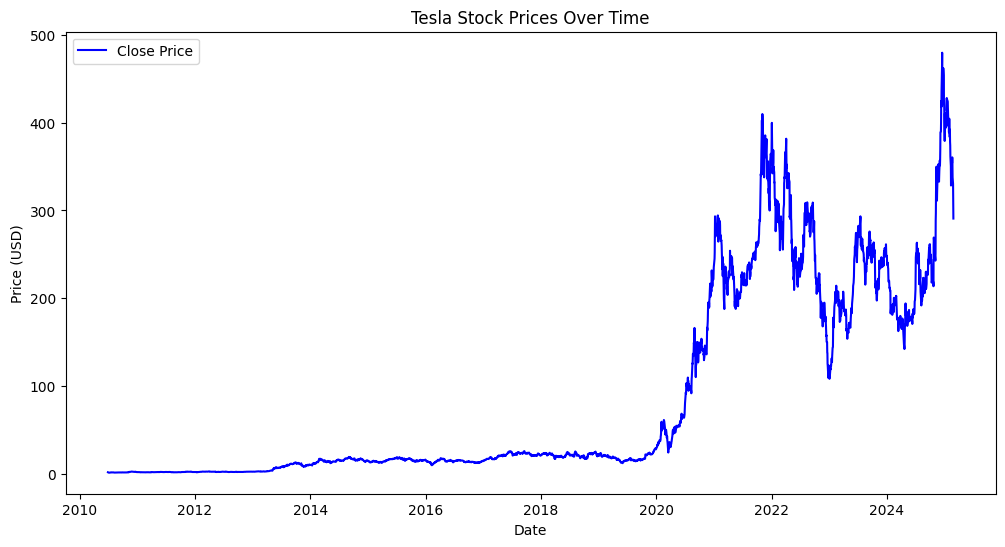

In [6]:
import matplotlib.pyplot as plt

# Function to plot stock data
def make_graph(data, title):
    plt.figure(figsize=(12,6))
    plt.plot(data["Date"], data["Close"], label="Close Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot Tesla Stock Data
make_graph(tesla_df, "Tesla Stock Prices Over Time")


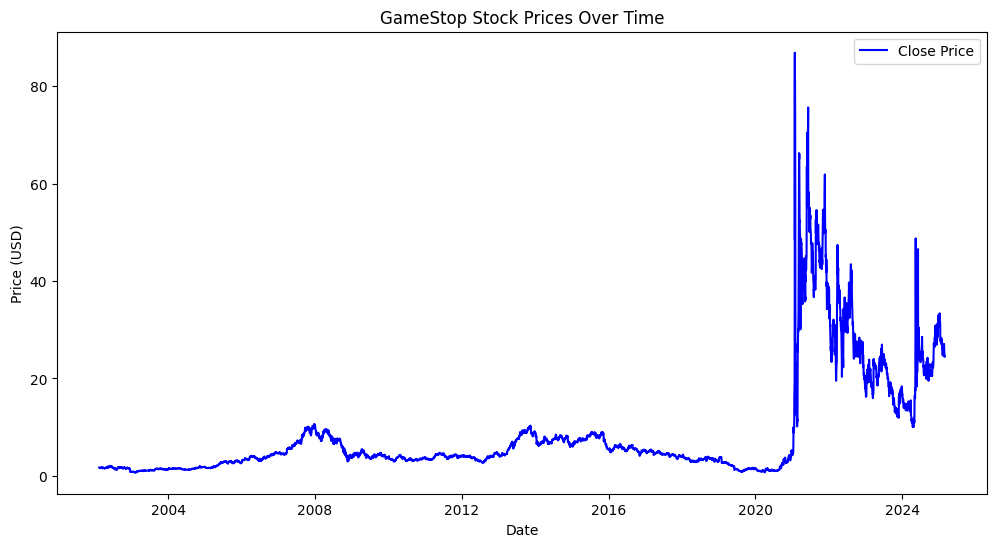

In [7]:
# Plot GameStop Stock Data
make_graph(gme_df, "GameStop Stock Prices Over Time")
